In [1]:
import numpy as np
import pandas as pd
import torch
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score
from dataHandler import load_data
from scoring import printScoring


# run in gpu

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Data Handler

In [2]:
# def scale_data(features,cols, method='standard'):
#     if method == 'standard':
#         scaler = StandardScaler()
#     elif method == 'minmax':
#         scaler = MinMaxScaler()
#     else:
#         raise ValueError('Invalid scaling method')
#     features[cols] = scaler.fit_transform(features[cols])





# def load_data(Features,Labels,target_column,scaling_method='standard', nofFeatures=20) :
#     # duplicated row indexes
#     duplicates = Features[Features.duplicated()].index
#     Features.drop(duplicates, inplace=True)
#     Labels.drop(duplicates, inplace=True)

#     # drop the row if target column is missing
#     missing_targets = Labels[Labels.isnull()].index
#     Features.drop(missing_targets, inplace=True)
#     Labels.drop(missing_targets, inplace=True)


#     Features.fillna(Features.mean(numeric_only=True), inplace=True)

#     # fill missing values with mode for object columns
#     for column in Features.columns:
#         if Features[column].dtype == 'object':
#             Features[column].fillna(Features[column].mode()[0], inplace=True)
#     # Label Encoding the target column
#     Labels = pd.DataFrame(LabelEncoder().fit_transform(Labels),columns=[target_column])

#     # print(Features.isnull().sum())

#     # One hot encoding the categorical columns
#     for column in Features.columns:
#         if Features[column].dtype == 'object':
#             Features[column] = Features[column].astype('category')
#     Features = pd.get_dummies(Features, drop_first=True)

#     # scale the data
#     scale_data(
#         Features,
#         Features.columns.difference(Features.select_dtypes(include=['bool']).columns), 
#         method=scaling_method
#     )

#     # correlation
#     correlations = Features.corrwith(Labels[target_column]).abs().sort_values(ascending=False)
#     # print(correlations[:20])

#     Labels.reset_index(drop=True, inplace=True)
#     Features.reset_index(drop=True, inplace=True)

#     top20features = Features[correlations.index[:nofFeatures]]
#     # print(top20features)


#     X_train, X_test, Y_train, Y_test = train_test_split(top20features, Labels, test_size=0.2,random_state=42)

#     return X_train, X_test, Y_train, Y_test


# Dataset Teleco

In [3]:
def preProcessDatasetTeleco(scaling_method ='standard',nofFeatures = 20) :
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    # drop the target rows with missing values
    df.drop(columns=['customerID'], inplace=True)

    df.replace(' ', np.nan, inplace=True)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # df.dropna(subset=['Churn'], inplace=True)
    df.drop_duplicates(inplace=True)

    Labels = df['Churn']
    Features = df.drop(columns=['Churn'])
    return load_data(Features,Labels,target_column='churn',scaling_method=scaling_method, nofFeatures=nofFeatures)


# Dataset Adult income

In [4]:
def preProcessDatasetAdult(scaling_method='standard', nofFeatures=20) :
    # Fetching the dataset
    column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race','sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
    # read the data from data file
    df = pd.read_csv('adult.data', header=None, names=column_names)
    # add the adult test data to the df
    df = pd.concat([df, pd.read_csv('adult.test', header=None, names=column_names)])
    # drop the target rows with missing values or ?
    df.replace(' ?', np.nan, inplace=True)
    df.dropna(subset=['income'], inplace=True)

    df.drop_duplicates(inplace=True)
    Labels = df['income']
    Features = df.drop(columns=['income'])
    # updating the labels output '>50k.' to '>50k' and '<=50k.' to '<=50k'
    Labels.replace(' >50K.', ' >50K', inplace=True)
    Labels.replace(' <=50K.', ' <=50K', inplace=True)


    return load_data(Features,Labels,target_column='income',scaling_method = scaling_method, nofFeatures=nofFeatures)


# DATASET creditcard

In [5]:
import pandas as pd

def preProcessDatasetCreditCard(scaling_method='minmax', nofFeatures=20):
    df = pd.read_csv('creditcard.csv')
    
    positive_samples = df[df['Class'] == 1]
    
    negative_samples = df[df['Class'] == 0].sample(n=20000, random_state=42)
    
    final_df = pd.concat([positive_samples, negative_samples])
    final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

    
    Features = final_df.drop(columns=['Class'])
    Labels = final_df['Class']

    return load_data(Features, Labels, target_column='Class', scaling_method=scaling_method, nofFeatures=nofFeatures)


In [6]:
# import pandas as pd

# def preProcessDatasetB1(scaling_method='minmax', nofFeatures=30):
#     final_df = pd.read_csv('B1.csv')
#     Features = final_df.drop(columns=['y'])
#     Labels = final_df['y']

#     return load_data(Features, Labels, target_column='y', scaling_method=scaling_method, nofFeatures=nofFeatures)

# Scoring Techniques

In [7]:
# def accuraci(y_pred, y_true) :
#     tp = np.sum((y_pred == 1) & (y_true == 1))
#     tn = np.sum((y_pred == 0) & (y_true == 0))
#     fp = np.sum((y_pred == 1) & (y_true == 0))
#     fn = np.sum((y_pred == 0) & (y_true == 1))
#     return (tp + tn) / (tp + tn + fp + fn)

# def sensitivity(y_pred, y_true) :
#     # y_pred = y_pred.to_numpy().flatten()
#     # y_true = y_true.to_numpy().flatten()
#     tp = np.sum((y_pred == 1) & (y_true == 1))
#     fn = np.sum((y_pred == 0) & (y_true == 1))
#     return tp / (tp + fn)

# def specificity(y_pred, y_true) :
#     tn = np.sum((y_pred == 0) & (y_true == 0))
#     fp = np.sum((y_pred == 1) & (y_true == 0))
#     return tn / (tn + fp)

# def precision(y_pred, y_true) :
#     tp = np.sum((y_pred == 1) & (y_true == 1))
#     fp = np.sum((y_pred == 1) & (y_true == 0))
#     return tp / (tp + fp)

# def f1_score(y_pred, y_true) :
#     prec = precision(y_pred, y_true)
#     rec = sensitivity(y_pred, y_true)
#     return 2 * (prec * rec) / (prec + rec)

# def printScoring(y_pred,y_pred_precision,y_true, retrn = False) :
#     if retrn == True :
#         return {
#             'Accuracy': accuraci(y_pred, y_true),
#             'Sensitivity': sensitivity(y_pred, y_true),
#             'Specificity': specificity(y_pred, y_true),
#             'Precision': precision(y_pred, y_true),
#             'F1 Score': f1_score(y_pred, y_true),
#             'AUROC': roc_auc_score(y_true, y_pred_precision),
#             'AUPR': average_precision_score(y_true, y_pred_precision)
#         }
#     # up to 3 decimal point
#     print()
#     print('Accuracy : {:.7f}'.format(accuraci(y_pred, y_true)))
#     print('Sensitivity : {:.7f}'.format(sensitivity(y_pred, y_true)))
#     print('Specificity : {:.7f}'.format(specificity(y_pred, y_true)))
#     print('Precision : {:.7f}'.format(precision(y_pred, y_true)))
#     print('F1 Score : {:.7f}'.format(f1_score(y_pred, y_true)))
#     print('AUROC : {:.7f}'.format(roc_auc_score(y_true, y_pred_precision)))
#     print('AUPR : {:.7f}'.format(average_precision_score(y_true, y_pred_precision)))
#     # print new line
#     print()


In [8]:
# # sigmoid function
# def sigmoid(z) :
#     return 1.0 / (1.0 + np.exp(-z))

# # loss function for all data points
# def loss(y, y_pred) :
#     # loss = -1/n * sum(y*log(h(x)) + (1-y)*log(1-h(x)))
#     y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
#     return np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
# # gradient of loss function for all data points
# def gradient(X, y, y_pred) :
#     # gradient = (y-h(x))x
#     return np.dot(X.T,y - y_pred)

# def ridgeRegularization(m,theta,l2_lambda) :
#     # regularization = (1/2m) * lambda * sum(|theta|^2)
#     return (l2_lambda / (2 * m)) * np.sum(np.square(theta[1:])) 

# def lassoRegularization(m,theta,l1_lambda) :
#     # regularization = (1/2m) * lambda * sum(|theta|)
#     return (l1_lambda / (2 * m)) * np.sum(np.abs(theta[1:]))

# def ridgeGrad(m, l2_lambda, theta, grad) :
#     grad[1:] += (l2_lambda / m) * theta[1:]
#     return grad

# def lassoGrad(m, l1_lambda, theta, grad) :
#     grad[1:] += (l1_lambda / m) * np.sign(theta[1:])
#     return grad

# Logistic Regression class

In [9]:
# class LogisticRegression:
#     def __init__(self, alpha = 0.0001, eps = 0.00001, n_iter = 1000, l2_lambda = 1, l1_lambda = 1 , regularizerType = None, theta = None):
#         self.alpha = alpha
#         self.n_iter = n_iter
#         self.eps = eps
#         self.theta = theta
#         self.l2_lambda = l2_lambda
#         self.l1_lambda = l1_lambda
#         self.regularizerType = regularizerType
    
#     def fit(self, X, Y) :

#         X = X.to_numpy().astype(float) if type(X) == pd.DataFrame else X
#         Y = Y.to_numpy().astype(float) if type(Y) == pd.DataFrame else Y

#         X = np.insert(X, 0, 1, axis=1) # add bias term to the first column
#         Y = Y.reshape(X.shape[0], 1) # reshape Y to be a column vector


#         # initialize theta , X and W needs to be multiplied
#         # So theta is a column vector, row_X = column_theta
#         if self.theta is None:
#             self.theta = np.zeros((X.shape[1], 1))

#         # print(X.shape, Y.shape, self.theta.shape)
    
#         iteration = 0
#         prev_cost = -np.inf

#         regularizer = {
#             'ridge': ridgeRegularization,
#             'lasso': lassoRegularization
#         }

#         gradients = {
#             'ridge': ridgeGrad,
#             'lasso': lassoGrad
#         }

#         while iteration < self.n_iter:
#             # calculate h(x) = sigmoid(theta^T * X + b)
#             h = sigmoid(np.dot(X, self.theta))

#             regularizerCost = 0

#             if self.regularizerType is not None:
#                 regularizerCost = regularizer[self.regularizerType](X.shape[0], self.theta, self.l2_lambda)
#             cost = loss(Y,h) + regularizerCost

#             # if cost - prev_cost < self.eps:
#             #     print(cost - prev_cost)
#             #     print(f"Stopping early at iteration {iteration} due to minimal change in cost.")
#             #     break

#             # prev_cost = cost

#             # print("cost at iteration ", iteration, " : ", cost)

#             grad = gradient(X, Y, h)
#             if self.regularizerType is not None:
#                 grad = gradients[self.regularizerType](X.shape[0], self.l2_lambda, self.theta, grad)
            

#             self.theta += self.alpha * grad
#             iteration += 1
    
#     def predict(self,X,rtype='binary') :
#         X = X.to_numpy().astype(float) if type(X) == pd.DataFrame else X
#         X = np.insert(X, 0, 1, axis=1)   
#         # print(X.shape, self.theta.shape)
#         h = sigmoid(np.dot(X, self.theta))
#         if rtype == 'sigmoid':
#             return np.array(h.flatten())
#         else:
#             return np.array([1 if i >= 0.5 else 0 for i in h])

# Test Logistic regression

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# randomly initialize of 100 data points with 10 features between 0 and 1

X = np.random.rand(12000, 30)
X = StandardScaler().fit_transform(X)

# randomly initialize the label of the data points 0 or 1
Y = np.random.randint(2, size=12000)

# split the data into training and testing set 80% and 20%
# split the traing into train and validation set 80% and 20%

test_size = int(0.2 * X.shape[0])
X_test = X[:test_size]
Y_test = Y[:test_size]

print(X_test.shape, Y_test.shape)

X_train = X[test_size:]
Y_train = Y[test_size:]

# Now split x_train and y_train into train and validation set
validation_size = int(0.2 * X_train.shape[0])
X_validation = X_train[:validation_size]
Y_validation = Y_train[:validation_size]

print(X_validation.shape, Y_validation.shape)

X_train = X_train[validation_size:]
Y_train = Y_train[validation_size:]

print(X_train.shape, Y_train.shape)

(2400, 30) (2400,)
(1920, 30) (1920,)
(7680, 30) (7680,)


In [11]:
from lr import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

# test the accuracy of the model
# Y_pred = model.predict(X_validation)
# accuracy = np.sum(Y_pred[0] == Y_validation)  / Y_validation.shape[0]
# print("Accuracy: ", accuracy)

# print(Y_validation,Y_pred[0])

9.01329349289881e-06
Stopping early at iteration 34 due to minimal change in cost.


# Bagging classifier implementation

In [12]:
# class BaggingClassifer :
#     def __init__(self, n_estimators = 10, max_samples = 1.0, n_iter = 1000, alpha = 0.0001, eps = 0.00001, l2_lambda = 1, l1_lambda = 1, regularizerType = None):
#         self.n_estimators = n_estimators
#         self.max_samples = max_samples
#         self.models = []
#         self.params = {
#             'n_iter': n_iter,
#             'alpha': alpha,
#             'eps': eps,
#             'l2_lambda': l2_lambda,
#             'l1_lambda': l1_lambda,
#             'regularizerType': regularizerType
#         }
    
#     def fit(self, X, Y):
#         # if dataframe
#         X = X.to_numpy().astype(float) if type(X) == pd.DataFrame else X 
#         Y = Y.to_numpy().astype(float) if type(Y) == pd.DataFrame else Y

#         # print('Bagging fit called')

#         np.random.seed(42) # for reproducibility
#         for i in range(self.n_estimators):
#             # sample with replacement
#             idx = np.random.choice(X.shape[0], int(self.max_samples * X.shape[0]), replace=True)
#             model = LogisticRegression(**self.params)
#             # print(np.unique(X[idx], axis=0).shape)
#             model.fit(X[idx], Y[idx])
#             self.models.append(model)

#     def draw_violin_plot(self, X, Y):
#         # Draw violin plots for each performance metric for the 9 bagging LR learners
#         X = X.to_numpy().astype(float) if type(X) == pd.DataFrame else X 
#         Y = Y.to_numpy().astype(float) if type(Y) == pd.DataFrame else Y

#         metrics_data = {
#             'Learner': [],
#             'Metric': [],
#             'Value': []
#         }

#         # Calculate metrics for each model
#         for i, model in enumerate(self.models):
#             y_pred = model.predict(X)
#             Accuracy = accuraci(y_pred, Y)
#             Sensitivity = sensitivity(y_pred, Y)
#             Specificity = specificity(y_pred, Y)
#             Precision = precision(y_pred, Y)
#             F1 = f1_score(y_pred, Y)
#             y_pred = model.predict(X, rtype='sigmoid')
#             Auroc = roc_auc_score(Y, y_pred)
#             Aupr = average_precision_score(Y, y_pred)

#             # Store metrics for plotting
#             metrics_data['Learner'].extend([i+1] * 7)
#             metrics_data['Metric'].extend(['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'AUROC', 'AUPR'])
#             metrics_data['Value'].extend([Accuracy, Sensitivity, Specificity, Precision, F1, Auroc, Aupr])

#         metrics_df = pd.DataFrame(metrics_data)
#         # mean and std_deviation for bagging LR learners

#         mean_std = metrics_df.groupby('Metric').agg({'Value': ['mean', 'std']})

#         print("Averege and standard deviation for bagging LR learners")
#         print(mean_std)
#         print()

#         # plt.figure(figsize=(14,10))
#         # sns.violinplot(x='Metric', y='Value', data=metrics_df, inner='box')
#         # plt.title('Performance Metrics for Bagging Logistic Regression Learners')
#         # plt.show()

#         # Plot violin plot for each metric
#         for metric in ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'AUROC', 'AUPR']:
#             plt.figure(figsize=(3, 3))
#             sns.violinplot(data=metrics_df[metrics_df['Metric'] == metric], x='Metric', y='Value',inner='box')
#             plt.title(f'{metric} for 9 Bagging LR learners')
#             plt.show()

    
#     def predict(self, X,rtype='binary') :

#         X = X.to_numpy().astype(float) if type(X) == pd.DataFrame else X
#         y_pred = np.zeros(X.shape[0])
#         for model in self.models:
#             y_pred += model.predict(X,rtype)
#         y_pred /= self.n_estimators
        
#         return np.array([1 if i >= 0.5 else 0 for i in y_pred]) if rtype == 'binary' else y_pred

# Testing BaggingClassifier

In [13]:
from bagging import BaggingClassifer
# print(X)

bagging_models = BaggingClassifer(n_estimators=5, max_samples=1)
bagging_models.fit(X_train, Y_train)

Y_pred = bagging_models.predict(X_validation)
accuracy = np.sum(Y_pred == Y_validation) / Y_validation.shape[0] 
print("Accuracy: ", accuracy)

7.80333903094288e-06
Stopping early at iteration 38 due to minimal change in cost.
8.941394298744854e-06
Stopping early at iteration 35 due to minimal change in cost.
7.988272955117282e-06
Stopping early at iteration 36 due to minimal change in cost.
9.017165211844258e-06
Stopping early at iteration 35 due to minimal change in cost.
7.423933311656583e-06
Stopping early at iteration 37 due to minimal change in cost.
Accuracy:  0.49375


# Stacking implementation

In [14]:
# class StackingClassifier :
#     def __init__(self, bagging_models, meta_classifiier = None,alpha = 0.0001, eps = 0.00001, n_iter = 1000, l2_lambda = 1, l1_lambda = 1, regularizerType = None):
#         self.bagging_models = bagging_models
#         if meta_classifiier is None:
#             meta_classifier = LogisticRegression(
#                                     alpha , 
#                                     eps, 
#                                     n_iter, 
#                                     l2_lambda, 
#                                     l1_lambda,
#                                     regularizerType
#                                 )
#         self.meta_classifier = meta_classifier
    
#     def fit(self, X, Y):
#         """Fit the bagging models for validation set
#          add preditions of the bagging models to the feature set as columns
#          then train the meta classifier on the old + new features
#         """
#         # convert the X,Y to numpy array if the input is dataframe
#         X = X.to_numpy().astype(float) if type(X) == pd.DataFrame else X
#         Y = Y.to_numpy().astype(float) if type(Y) == pd.DataFrame else Y



#         # converting the predictions of the bagging models into features so transpositing
#         prediction_features = np.array([model.predict(X) for model in self.bagging_models]).T
#         X_new = np.hstack((X, prediction_features))  

#         # train the meta classifier with validation set
#         self.meta_classifier.fit(X_new, Y)

#     def predict(self, X,rtype = 'binary') :
#         "Predict the output of the meta classifier"
#         X = X.to_numpy().astype(float) if type(X) == pd.DataFrame else X

#         prediction_features = np.array([model.predict(X) for model in self.bagging_models]).T
#         X_new = np.hstack((X, prediction_features))
#         return self.meta_classifier.predict(X_new,rtype)


        


# Testing Stacking 

In [15]:
from stacking import StackingClassifier
stackingClassifier = StackingClassifier(bagging_models.models)

stackingClassifier.fit(X_validation, Y_validation)

Y_pred = stackingClassifier.predict(X_test)
accuracy = np.sum(Y_pred == Y_test) / Y_test.shape[0]

print("Accuracy STacking: ", accuracy)

# Logistic Regression test_set
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == Y_test) / Y_test.shape[0]

print("Accuracy Logistic Regression: ", accuracy)

# with L2 regularization


# Bagging test_set

y_pred = bagging_models.predict(X_test)

accuracy = np.sum(y_pred == Y_test) / Y_test.shape[0]

print("Accuracy Bagging: ", accuracy)

Accuracy STacking:  0.5095833333333334
Accuracy Logistic Regression:  0.5054166666666666
Accuracy Bagging:  0.4995833333333333


# Train and Validation pipelining

LogisticRegression scores on test set

Accuracy : 0.9941392
Sensitivity : 0.7850467
Specificity : 0.9997492
Precision : 0.9882353
F1 Score : 0.8750000
AUROC : 0.9758036
AUPR : 0.8792318

Bagging scores on test set

Accuracy : 0.9941392
Sensitivity : 0.7850467
Specificity : 0.9997492
Precision : 0.9882353
F1 Score : 0.8750000
AUROC : 0.9754427
AUPR : 0.8847702

Stacking scores on test set

Accuracy : 0.9943834
Sensitivity : 0.8037383
Specificity : 0.9994985
Precision : 0.9772727
F1 Score : 0.8820513
AUROC : 0.9774815
AUPR : 0.8840384

Averege and standard deviation for bagging LR learners
                Value          
                 mean       std
Metric                         
AUPR         0.879117  0.008608
AUROC        0.971186  0.004814
Accuracy     0.993976  0.000299
F1 Score     0.871829  0.006167
Precision    0.981922  0.011406
Sensitivity  0.784008  0.007306
Specificity  0.999610  0.000254



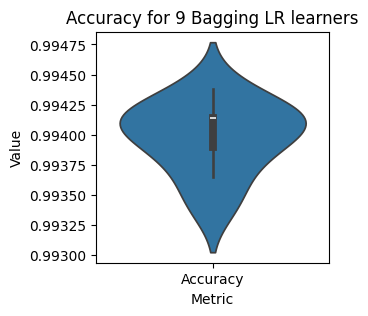

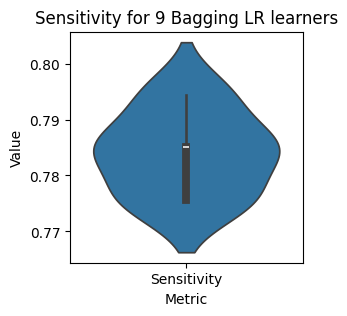

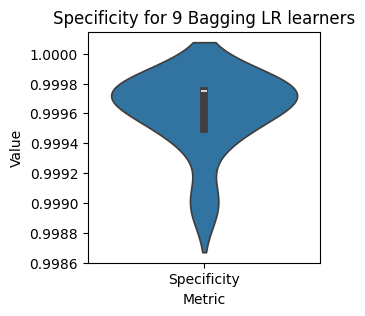

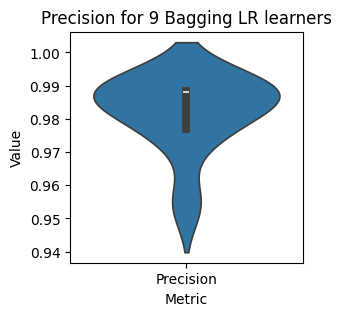

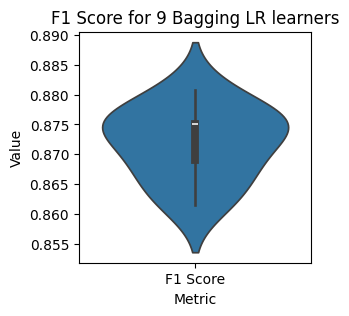

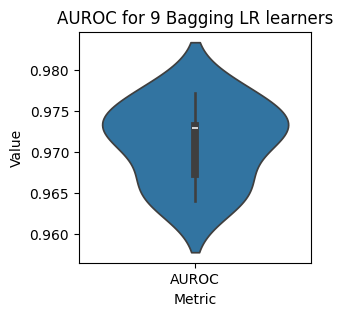

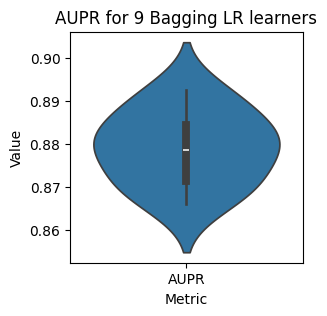

In [16]:
##########################################################      UNDO COMMENT        #########################################

# X_train, X_test, Y_train, Y_test = preProcessDatasetTeleco(scaling_method='standard', nofFeatures=50)
# X_train, X_test, Y_train, Y_test = preProcessDatasetAdult(scaling_method='standard', nofFeatures=40)
X_train, X_test, Y_train, Y_test = preProcessDatasetCreditCard(scaling_method='standard', nofFeatures=30)

validation_size = int(0.2 * X_train.shape[0])
X_validation = X_train[:validation_size]
Y_validation = Y_train[:validation_size]
X_train = X_train[validation_size:]
Y_train = Y_train[validation_size:]

# Flatten the test and validation set
Y_test = Y_test.to_numpy().flatten()
Y_validation = Y_validation.to_numpy().flatten()


##################################################   UNDO COMMENT #################################################

# model = LogisticRegression(alpha=0.0001) # for Dataset1
# model = LogisticRegression(l2_lambda=2, alpha=0.0001,regularizerType='ridge') # for dataset2
model = LogisticRegression(alpha=0.0001) # for dataset 3

model.fit(X_train, Y_train)
print("LogisticRegression scores on test set")
Y_pred = model.predict(X_test)
Y_pred_precision = model.predict(X_test, rtype='sigmoid')
printScoring(Y_pred,Y_pred_precision, Y_test)


###############################################    UNDO COMMENT     #################################################
# bagging_models = BaggingClassifer(n_estimators=9, max_samples=1, alpha=0.0001) # DS1    
# bagging_models = BaggingClassifer(n_estimators=9, max_samples=1, l2_lambda=2,regularizerType='ridge') # DS2
bagging_models = BaggingClassifer(n_estimators=9, max_samples=1, alpha=0.0001) # DS3
bagging_models.fit(X_train, Y_train)

print("Bagging scores on test set")
Y_pred = bagging_models.predict(X_test)
Y_pred_precision = bagging_models.predict(X_test, rtype='sigmoid')
printScoring(Y_pred,Y_pred_precision, Y_test)


######################################################### UNDO COMMENT    ######################################


# stackingClassifier = StackingClassifier(bagging_models.models, alpha=0.0001) # ds1
# stackingClassifier = StackingClassifier(bagging_models.models, alpha = 0.0001,l2_lambda=2,regularizerType='ridge') # ds2
stackingClassifier = StackingClassifier(bagging_models.models, alpha=0.0001) # for ds3




stackingClassifier.fit(X_validation, Y_validation)

print("Stacking scores on test set")
Y_pred = stackingClassifier.predict(X_test)
Y_pred_precision = stackingClassifier.predict(X_test, rtype='sigmoid')
printScoring(Y_pred,Y_pred_precision, Y_test)

bagging_models.draw_violin_plot(X_test, Y_test)

